# ```Stock Market Analysis```
Name: Katari .Shanmukh Phani Prabhas 

# **Change in price of the stock overtime**

We'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.
we will be using yahoo finance for stock market data set.

In [1]:

pip install -q yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime


tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-17,134.559998,135.619995,133.210007,133.559998,133.559998,48450200,AMAZON
2023-07-18,132.710007,133.860001,131.350006,132.830002,132.830002,54969100,AMAZON
2023-07-19,133.389999,135.990005,132.529999,135.360001,135.360001,54531000,AMAZON
2023-07-20,134.070007,134.789993,129.330002,129.960007,129.960007,59820600,AMAZON
2023-07-21,131.339996,131.369995,128.419998,130.000000,130.000000,133265000,AMAZON
2023-07-24,130.309998,131.660004,128.350006,128.800003,128.800003,45591100,AMAZON
2023-07-25,129.309998,129.580002,128.529999,129.130005,129.130005,39236700,AMAZON
2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100,AMAZON
2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.



We have only 255 records in one year because weekends are not included in the data.

## **Closing Price**

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

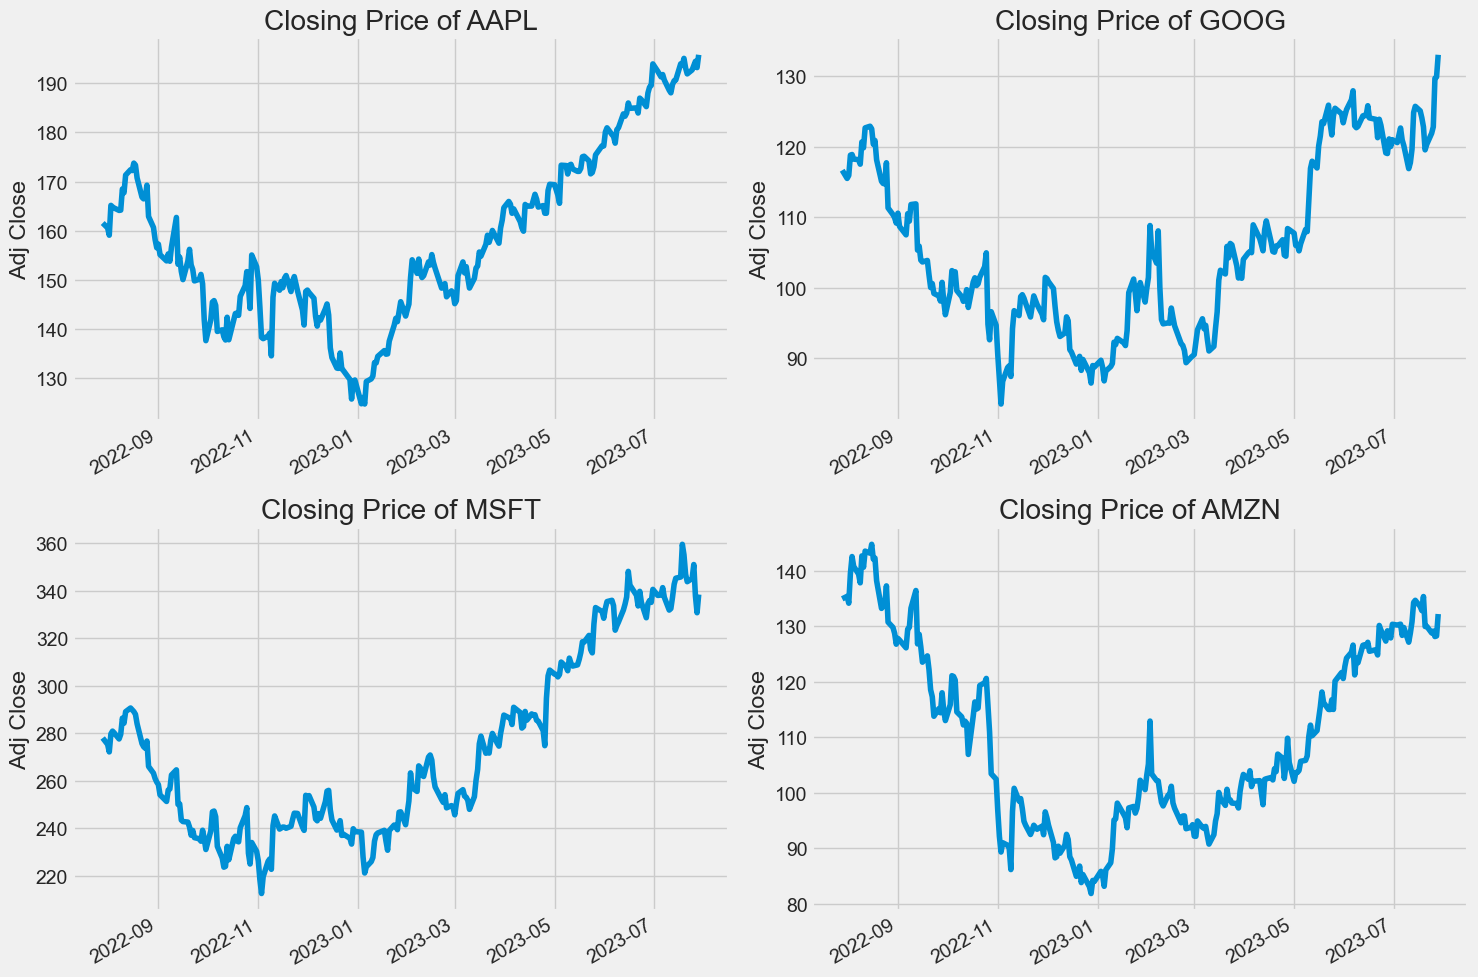

In [3]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

# **Moving average of the various stocks**

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

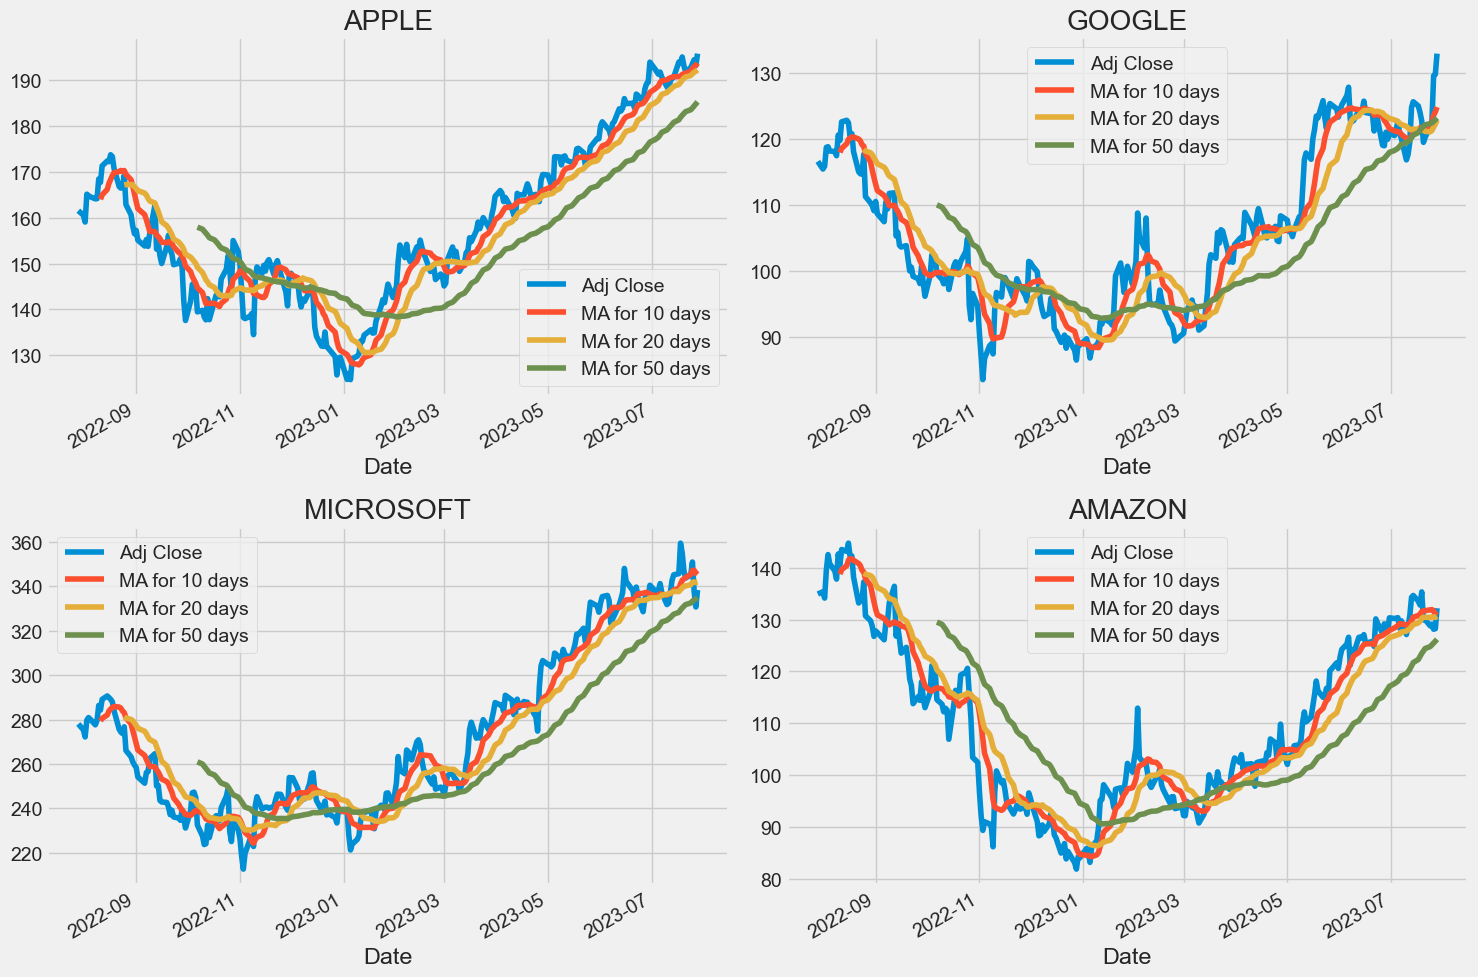

In [4]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

#  **Predicting the closing price stock price of APPLE inc:**

In [5]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482925,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550011,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821995,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801658,394024400
...,...,...,...,...,...,...
2023-07-24,193.410004,194.910004,192.250000,192.750000,192.750000,45377800
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900


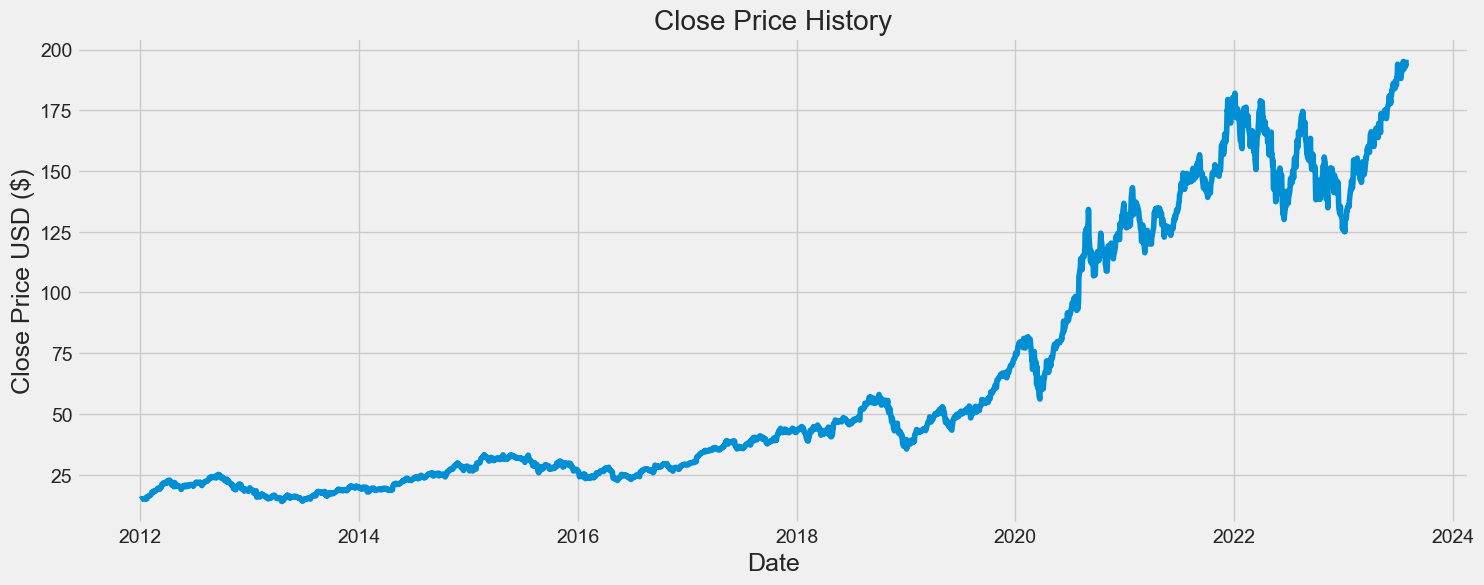

In [6]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2766

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00406463],
       [0.00449858],
       [0.00539987],
       ...,
       [0.99268758],
       [0.98565007],
       [1.        ]])

In [9]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00406463, 0.00449858, 0.00539987, 0.00625796, 0.0061264 ,
       0.0064229 , 0.00628742, 0.00605964, 0.00574939, 0.00670959,
       0.00757553, 0.00730849, 0.00584561, 0.00724172, 0.00586721,
       0.01102163, 0.01062303, 0.01114338, 0.01226851, 0.01294988,
       0.01289294, 0.01268283, 0.01357823, 0.01442061, 0.01537492,
       0.01691634, 0.0201543 , 0.02020339, 0.02200597, 0.02335299,
       0.02103792, 0.02192938, 0.02191171, 0.02441137, 0.02405595,
       0.02471375, 0.02589583, 0.02655364, 0.02844851, 0.02982891,
       0.03022752, 0.03036694, 0.0280067 , 0.02743725, 0.02752169,
       0.02974055, 0.03036498, 0.03170611, 0.03486749, 0.03908528,
       0.03829592, 0.03829788, 0.04134734, 0.04230165, 0.04162224,
       0.04100175, 0.04035572, 0.04250192, 0.04397462, 0.04459119])]
[0.04306744044727151]

[array([0.00406463, 0.00449858, 0.00539987, 0.00625796, 0.0061264 ,
       0.0064229 , 0.00628742, 0.00605964, 0.00574939, 0.00670959,
       0.00757553, 0.00730849, 0.00

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

2706/2706 [==============================] - 36s 12ms/step - loss: 0.0011


In [11]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 11ms/step


2.816523618767612

C:\Users\Shanmukhdhanush\AppData\Local\Temp\ipykernel_13328\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


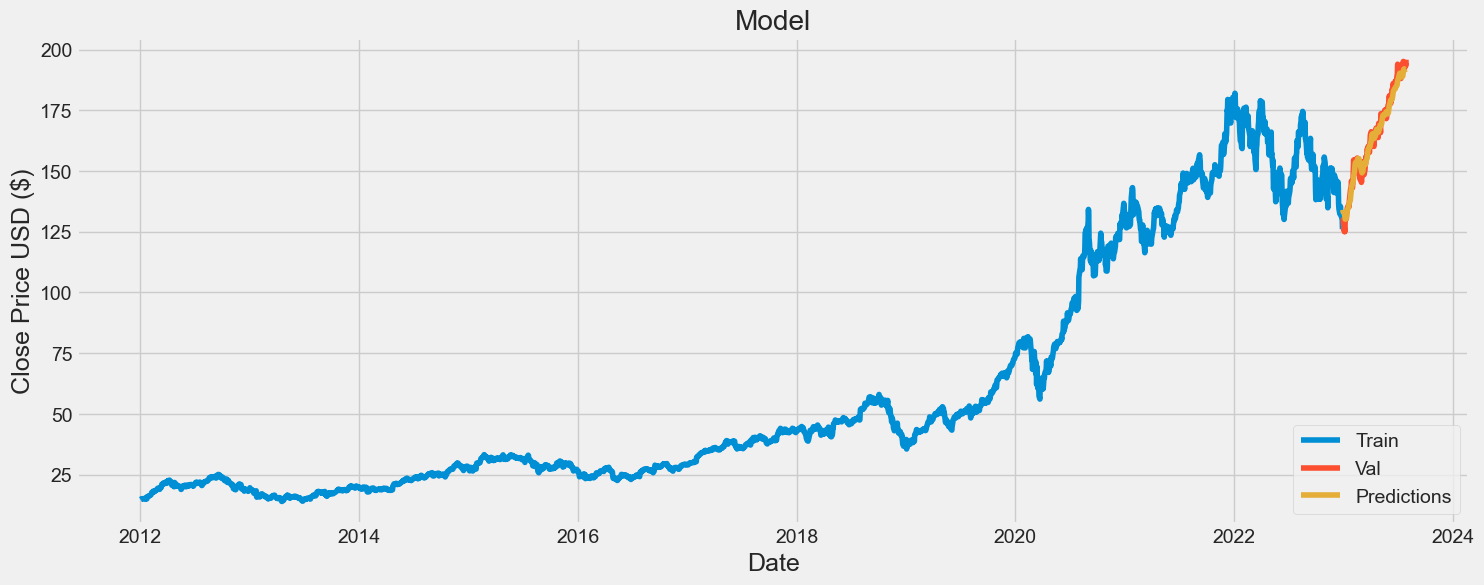

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [13]:
valid

,Close,Predictions
Date,,
2022-12-29,129.610001,134.020615
2022-12-30,129.929993,133.215149
2023-01-03,125.070000,132.889694
2023-01-04,126.360001,131.860031
2023-01-05,125.019997,131.036484
...,...,...
2023-07-24,192.750000,191.838409
2023-07-25,193.619995,191.711899
2023-07-26,194.500000,191.776810
